<a href="https://colab.research.google.com/github/jiwoong2/deeplearning/blob/main/DQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DQN

이번 프로젝트는 DQN 모델을 구현하고 훈련시켜봄으로써 DQN 아키텍처에 대해 깊이 이해하는 것을 목적으로 한다.

# 논문에서 제시하는 기본 접근방법들의 문제점과 해결법.

1. 큐러닝의 한계.

기존 큐러닝은 샘플링을 통해 상태-행동 쌍에 대한 큐값을 업데이트하는 방법을 사용한다. 하지만 이는 전혀 실용적이지 않은데 그 이유는 Q 값을 각 상태, 행동 쌍에 대해 따로따로 추정하고 일반화가 전혀 이루어지지 않기 때문에 상태, 행동 쌍이 거의 무한한 환경에서는 사용이 불가능하기 때문이다.
DQN에서는 이 문제를 해결하기위해 딥러닝 모델을 사용해 Q값을 일반화하고 추정하며 이를 Q-network라고 한다.

2. 딥러닝 모델을 강화학습에 적용할때 직면하는 어려움.

딥러닝모델을 강화학습에 이식하는것에는 여러 어려움이 있다. 딥러닝모델을 훈련시키기 위해서는 라벨링된 빅데이터가 필요한 반면 강화학습은 라벨링된 데이터가 없고 희박하거나 noisy하고 지연된 보상으로부터 학습해야한다. 또 데이터가 독립적이라고 가정하는 딥러닝과 달리 강화학습은 상관관계가 큰 sequence를 사용하고 강화학습의 데이터 분포는 고정된 딥러닝의 경우와다르게 행동정책이 업데이트됨에 따라 달라진다. DQN은 이를 극복하기위해 experience replay mechanism을 사용해 과거경험을 저장하고 여기서 무작위로 샘플링한 데이터로 모델을 업데이트하는 방법을 사용한다.

3. 기존 큐값추정 딥러닝모델의 계산비용 문제.

기존 아키텍쳐는 상태-행동쌍을 입력받아 큐값을 계산하는 방식을 사용했다. 하지만 이는 선택 가능한 행동이 많아질수록 계산비용히 선형적으로 증하게된다. 반면 DQN에서는 상태만을 입력으로 받고 가능한 행동의 수만큼 큐값을 출력하는 구조를 사용함으로써 이런 문제를 해결했다.

# DQN 이키텍쳐 특징

1. experience replay mechanism

DQN은 위에서 제시한 문제를 해결하기위해 experiemce replay mechanism을 사용한다. experience replay mechanism에 저장된 경험들은 무작위로 샘플링해 Q-network의 업데이트에 사용하며 이런 방법은 여러 장점을 갖는다. 첫번째 장점으로는 저장된 경험 데이터들이 잠재적으로 여러번 사용되 수 있으므로 좋은 데이터 효율을 갖는다는 것 이다. 두번째로는 강화학습의 특성상 연이은 경험 데이터들은 강한 상관관계를 갖고 있는데 저장된 경험들을 무작위로 샘플링 함으로써 이를 완화할 수 있다는 점이다. 마지막으로 많은 경험들로 부터 샘플링된 데이터는 경험들을 평균내어 학습을 부드럽게 하고 파라미터의 진동이나 발산을 방지할 수 있다는 점 이다. 하지만 단점으로 각 경험들의 중요성을 무시한다는 점이 있다. 중요한 경험이 있더라도 가중없이 무작위샘플린되며 메모리 용량이 다차면 역시 아무리 중요한 경험이라도 순서에따라 삭제된다.

2. Q러닝을 사용하는 이유.

만약 DQN을 on-policy 학습으로 구현한다면 타겟정책과 행동정책이 같으므로 현재 파라미터가 파라미터가 학습되는 다음 데이터 샘플을 결정하게 될 것 이다. 이렇게되면 학습샘플은 행동정책에따라 편향될것이고 이는 치명적인 문제를 야기할 가능성이 크다. DQN은 off-policy방법인 큐러닝을 사용함으로써 이런 문제를 방지한다.

3. 타겟네트워크

DQN에서 제시한 Loss function

$L_i(\theta_i) = E_{s, a-p(.)}[(y_i - Q(s,a;\theta_i))^2]$

$ y_i = E_{s'-\varepsilon}[r + \gamma max_{a'}Q(s', a';\theta_{i-1})] $

을 살펴보면 타겟을 만드는 타겟네트워크와 큐값을 추정하 큐네트워크의 파라미터 시점이 다르다는 것을 알 수 있다. 여기서 중요한 지점은 $ \theta_{i-1} $다. Q-network가 업데이되는동안 타겟네트워크 업데이트돼지않고 고정된 파라미터로 타겟값을 추정한다. 이는 학습에 사용될 데이터의 분포가 파라미터에 의존하기 때문이다. 이렇게 함으로써 타깃값이 너무 빠르게 변화하는것을 방지해 학습안정성을 높일 수 있다.



# 학습 결과

훈련은 Q모델 업데이트 기준 총 100만 스텝(20시간)을 진행했고 시간, 컴퓨터자원의 한계로 에이전트의 성능이 좋은 값으로 수렴하거나 하락하는 구간까지 훈련을 지속하지 못 했다.

In [16]:
from IPython.display import HTML
from base64 import b64encode

In [17]:
video_path = '/content/drive/MyDrive/Colab Notebooks/딥러닝/포트폴리오/DQN/동영상/995000.mp4'

# 비디오를 base64로 인코딩하여 HTML에서 사용할 수 있는 형태로 만듬.
mp4 = open(video_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

# HTML video 태그를 사용하여 비디오를 임베드하고 재생.
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# 구현

In [18]:
!pip install gymnasium
!pip install gymnasium[atari]
!pip install gymnasium[accept-rom-license]
!pip install imageio
!pip install imageio-ffmpeg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=734beb9d5be660d067046c85ef2198f893c4045b7f250f79e36d5bbbe8a1ad93
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


In [19]:
import gymnasium as gym
import imageio
from gymnasium.wrappers import FrameStack, GrayScaleObservation
import torch
from torch import nn
import numpy as np
import torch.optim as optim
import random
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from google.colab import drive
from tqdm.auto import tqdm
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

drive.mount('/content/drive')

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


util

In [20]:
# 에피소드를 10번 진행한(greedy action으로) 후 평균 reward를 반환.

def play_game(model, env, file_name, record : bool = False):

    total_reward = 0
    frames = []

    for i in range(10):

        obs, info = env.reset()
        if record == True:

            frames.append(env.render())

        obs, reward, terminated, truncated, info = env.step(1)
        if record == True:
            frames.append(env.render())

        while(terminated == False and truncated == False and info['lives'] == 5):

            _, action = model.greedy_action(torch.tensor(np.array(obs)).to(DEVICE))
            obs, reward, terminated, truncated, info = env.step(action)
            if record == True:
                frames.append(env.render())

            total_reward += reward

    # 동영상 저장.
    if record == True:
        with imageio.get_writer(f'/content/drive/MyDrive/동영상/{file_name}.mp4', fps=30, ) as video:
            for frame in frames:
                video.append_data(frame)

    total_reward = total_reward / 10

    return total_reward

# Q모델 업데이트

def model_update(q_model, target_model, optimizer, buffer, batch_size):

    obs_batch, action_batch, reward_batch, nobs_batch = buffer.sample(batch_size)

    obs_batch = torch.tensor(np.array(obs_batch)).float().to(DEVICE)
    action_batch = torch.tensor(np.array(action_batch)).float().to(DEVICE)
    reward_batch = torch.tensor(np.array(reward_batch)).float().to(DEVICE)
    nobs_batch = torch.tensor(np.array(nobs_batch)).float().to(DEVICE)

    with torch.no_grad():
            y, _ = target_model.greedy_action(nobs_batch)
            y = 0.99*y # discount facter
            y = y + reward_batch

    q = q_model.generate_q(obs_batch, action_batch)

    loss = F.mse_loss(y, q)

    optimizer.zero_grad()  # 그래디언트 초기화
    loss.backward()  # 역전파
    optimizer.step()  # 가중치 업데이트

    loss = loss.item()

    return loss

# 정해진 스텝만큼 시뮬레이션을 진행하고 각 스텝을 경험리플레이에 저장.
# 한 에피소드당 5개의 목숨이 주어지지만 목숨을 잃는데 패널티는 없으므로 그냥 한 에피소드로 설정한다.

def step_and_stack(model, env, buffer, epsilon, step_size):

    obs, reward, terminated, truncated, info = env.step(1) # 스타트 버튼. 일부 아타리게임은 스타트버튼을 눌러야 시작됨.

    for i in (range(step_size)):

        if terminated == False and truncated == False and info['lives'] == 5:

            action = model.epsilon_greedy_action(torch.tensor(np.array(obs)).to(DEVICE), epsilon)
            nobs, reward, terminated, truncated, info = env.step(action)

            buffer.add([obs, action, reward, nobs])
            obs = nobs

        else:

            obs, info = env.reset()
            nobs, reward, terminated, truncated, info = env.step(1)
            buffer.add([obs, 1, reward, nobs])
            obs = nobs

    return

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Experience replay

In [21]:
class ExperienceReplayMemory:
    def __init__(self, capacity):
        self.capacity = capacity  # 메모리의 최대 저장 용량
        self.memory = []  # 경험을 저장할 리스트

    def add(self, experience):
        # 메모리에 경험을 추가합니다. 메모리가 꽉 찼을 경우 가장 오래된 경험을 제거.
        if len(self.memory) < self.capacity:
            self.memory.append(experience)
        else:
            self.memory.pop(0)  # 가장 오래된 경험을 제거
            self.memory.append(experience)

    def sample(self, batch_size):
        # 메모리에서 무작위로 경험을 샘플링.
        sample = random.sample(self.memory, batch_size)

        obs_batch = [obs for obs, _, _, _ in sample]
        action_batch = [action for _, action, _, _ in sample]
        reward_batch = [reward for _, _, reward, _ in sample]
        nobs_batch = [nobs for _, _, _, nobs in sample]

        return obs_batch, action_batch, reward_batch, nobs_batch

    def __len__(self):
        # 메모리에 저장된 경험의 수를 반환
        return len(self.memory)

DQN아키텍쳐

Note:

1. 모델 구조

레이어 구조는 DQN논문에서 제시한것과 동일하다. 처음엔 환경에서 반환하는 게임 이미지를 그대로 사용하려고 컨볼루션 레이어를 늘리고 2D batch normalization 레이어를 추가해서 훈련을 시작했지만 에이전트의 성능향상을 이끌어내지 못 하고 훈련에 실패했다. 처음엔 실패원인으로 오버피팅을 생각하고 적절한 파라미터를 찾으려고 시도했지만 강화학습특성상 적절한 하이퍼파라미터를 찾는게 쉽지않고 이번 프로젝트가 강화학습을 주제로한 첫번째 프로젝트인만큼 일단 에이전트의 성능향상을 관찰하는것이 최우선 목표였으므로 커스터마이징을 포기하고 논문에서 제시한 모델을 그대로 구현했다.

2. 강화학습에서 맥스풀링을 사용하지 않는 이유

맥스풀링은 정보를 요약하며 계산비용을 줄여주는 효과가 있지만 강화학습에서는 환경의 미세한 변화에 에이전트가 반응해야하는 경우가 있으므로 미세한정보라도 손실되면 에이전트의 학습에 안 좋은 영향을 줄 수 있다.

3. 드롭아웃 레이어를 사용하지 않는 이유.

일반적인 딥러닝 훈련에서 데이터의 분포는 고정되어있으므로 드롭웃은 모데이 데이터의 일부분에 과적합되는 방지한다. 하지만 강화학습에서 데이터는 에이전트가 환경에서 데이터를 계속해서 수집하고 위에서 언급됬듯이 데이터는 파라미터에 의존적이므로 그 분포가 계속해서 달라지게된다. 이 과정에서 국소적인 데이터에 과적합될 위험은 줄어들며 굳이 드롭아웃 레이어를 사용해 안정적인 정책학습을 방해할 필요는 없다.

In [22]:
class DQN(nn.Module):
    def __init__(self):

        super().__init__()

        self.conv1 = nn.Sequential(nn.Conv2d(4, 16, kernel_size = 8, stride = 4),
                                   nn.ReLU())

        self.conv2 = nn.Sequential(nn.Conv2d(16, 32, kernel_size = 4, stride = 2),
                                   nn.ReLU())

        self.fc = nn.Sequential(nn.Linear(2592, 256),
                                nn.ReLU(),
                                nn.Linear(256, 4))

    def forward(self, x):

        with torch.no_grad():
            x = self.preprocessing(x)

        x = self.conv1(x)
        x = self.conv2(x)
        x = torch.flatten(x,start_dim=1)
        x = self.fc(x)

        return x

    # greedy action. 최대 Q값을 갖는 행동의 인덱스와 Q값을 반환한다.
    def greedy_action(self, x):

        with torch.no_grad():
            x = self.forward(x)
            x, idx = torch.max(x, 1)

        return x, idx

    # epsilon greedy action. 행동 인덱스만 반환.
    def epsilon_greedy_action(self, x, epsilon):

        with torch.no_grad():
            if random.random() > epsilon:
                x, idx = self.greedy_action(x)
                x = idx.item()

            else:
                x = random.randrange(4)

        return x

    # 특저행동에 대한 Q값을 추정.
    def generate_q(self, x, action_batch):

        x = self.forward(x)
        action_batch = action_batch.unsqueeze(1).long()
        q = torch.gather(x, 1, action_batch)
        q = q.squeeze(1)

        return q

    # 이미지 전처리.
    def preprocessing(self, x):

        # x = np.array(x)
        # x = torch.tensor(x)

        if x.ndim == 3:
            x = x.unsqueeze(0)

        x = x[:, :, 34:-16, :]
        resize_transform = transforms.Resize((84, 84))
        x = resize_transform(x)
        x = x.float() / 255.

        return x

Q모델과 타겟모델 생성.

In [23]:
q_model = DQN().to(DEVICE)
t_model = DQN().to(DEVICE)
t_model.load_state_dict(q_model.state_dict()) # Q모델의 파라미터를 타겟모델에 복사한다.

<All keys matched successfully>

환경 초기화.

Note

1. Frame stack

하나의 프레임만으로는 공의움직임 등 환경에 대한 정보가 너무 불확실하므로 4개의 프레임을 쌓아서 입력으로 사용한다.

2. Lazy Frame

Lazy Frame 처리 기법은 에이전트의 학습 과정에서 메모리 사용량을 줄이고, 계산 효율성을 높이기 위해 사용된다. 이 방법은 각 스텝에서 환경으로부터의 모든 프레임을 즉시 처리하는 대신, 필요할 때까지 프레임의 처리를 지연시키는 방식으로 작동한다. 처음엔 이 사실을 모르고 모든 프레임을 사용하기 좋게 텐서로 변환해 저장해 RAM용량이 부족해지는 현상을 겪었다. 결론적으로 컴퓨터 자원을 효율적으로 사용하기 위해서는 샘플링된 데이터만 텐서로 변환하는 것이 합리적인 선택이다.

In [24]:
#환경 초기화
env = gym.make("ALE/Breakout-v5", render_mode='rgb_array', obs_type='grayscale')
env = FrameStack(env, 4)
obs, info = env.reset()

하이퍼파라미터 초기화.

Note

1. experience replay 버퍼 사이즈

경험재성 버퍼의 용량은 DQN 모델을 학습시키는데 중요한 하이퍼파라미터다. 용량이 너무 작으면 학습데이터가 충분히 활용되지 못 하고 새로운 경험에의해 밀려나게되어 데이터 효울서이 떨어지게 될 것 이고 너무 크면 메모리자원이 더 많이 필요하고 학습효율성이 저하되게 된다.

2. optimizer

처음엔 Admam을 사용하려했지만 적잘한 하이퍼파라미터를 찾는데 너무 오랜시간과 비용이 들어 위의 모델구조와 같이 결국 포기할 수 밖에 없었다. 훈련시간은 물론 에이전트의 성능향상을 확인하는데까지 너무 오랜 시간이 걸리기 때문이다. 해서 모델의 훈련이 진행되는동안 훈련과정을 관찰할 필요를 느꼈다.

In [25]:
# 매개변수 초기화.
epsilon = 1
buffer = ExperienceReplayMemory(1000000)
#optimizer = optim.Adam(q_model.parameters(), lr= 0.00025)
optimizer = optim.RMSprop(q_model.parameters(), lr=0.00025, alpha=0.95, eps=1e-6)
reward_r = []
loss_r = []
epsilon_r = []

훈련 루프

Note

1. 에피소드단위로 루프를 구성하지 않은 이유.

훈련 루프를 에피소드 단위로 구성하는것은 직관적이긴 하지만 모델업데이트나 ecperience replay 버퍼에 데이터를 스택하는 등 에이전트 학습의 대부분이 스텝단위로 이루어지므로 스텝단위로 루프를 구성했다.

2. Q모델과 타겟모델의 업데이터 주기.

Q모델의 업데이트 주기는 10스텝, 타겟모델의 업데이트 주기는 50000스텝으로 설정했다. 결론적으로 Q모델이 5000번 업데이트된후 타겟모델로 파라미터를 복사하며 특히 타겟모델의 업데이트 주기는 에이전트학습에 큰 영향을 미치는데 처음 시도에서는 너무 빠른 주기로 타겟모델을 업데이트해 훈련에 실패했다.

3. 훈련 결과.

훈련루프는 모델업데이트 기준으로 총 100만step진행했으며 20시간이 소요 됐다. 에이전트의 성능은 변도성이 크지만 꾸준히 상향됬다. 하지만 아쉽게도 성능이 수렴하는 구간까지 훈련을 진행하지는 못 했다.

In [ ]:
step_and_stack(q_model, env, buffer, epsilon, step_size = 50000)

for i in tqdm(range(1000000)):

    step_and_stack(q_model, env, buffer, epsilon, step_size = 10)

    loss = model_update(q_model, t_model, optimizer, buffer, 64)
    loss_r.append(loss)

    if i % 5000 == 0:

        t_model.load_state_dict(q_model.state_dict())
        torch.save(q_model, f'/content/drive/MyDrive/모델/{str(i)}.pth')

        r = play_game(q_model, env, str(i), record = True)

        print(f"total reward : {r}")
        reward_r.append(r)

    if i % 500 == 0:
        epsilon = max(epsilon - 0.00045, 0.1)
        epsilon_r.append(epsilon)

훈련과정 저장.

Note

훈련이 오래걸리는만큼 훈련과정 기록의 중요성을 크게 느꼇다. 이번프로젝트엣는 훈련루프 중간에 이 코드를 추가해 훈련중간에 과정을 체크하지 못 했다는 아쉬움이 남지만 다음 프로젝트에서는 훈련루프에 파일쓰기 과정을 추가해 훈련중에도 과정을 살펴볼수 있게 할 예정이다.

In [ ]:
# reward_r 리스트를 reward.txt 파일에 저장
with open('/content/drive/MyDrive/reward.txt', 'w', encoding='utf-8') as file:
    for item in reward_r:
        file.write("%s\n" % item)

# loss_r 리스트를 loss.txt 파일에 저장
with open('/content/drive/MyDrive/loss.txt', 'w', encoding='utf-8') as file:
    for item in loss_r:
        file.write("%s\n" % item)

# epsilon_r 리스트를 epsilon.txt 파일에 저장
with open('/content/drive/MyDrive/epsilon.txt', 'w', encoding='utf-8') as file:
    for item in epsilon_r:
        file.write("%s\n" % item)

훈련 과정 분석

In [1]:
# reward_r 리스트로 데이터를 불러오기
reward_r = []
with open('/content/drive/MyDrive/Colab Notebooks/딥러닝/포트폴리오/DQN/reward.txt', 'r', encoding='utf-8') as file:
    for line in file:
        reward_r.append(float(line.strip()))

# loss_r 리스트로 데이터를 불러오기
loss_r = []
with open('/content/drive/MyDrive/Colab Notebooks/딥러닝/포트폴리오/DQN/loss.txt', 'r', encoding='utf-8') as file:
    for line in file:
        loss_r.append(float(line.strip()))

# epsilon_r 리스트로 데이터를 불러오기
epsilon_r = []
with open('/content/drive/MyDrive/Colab Notebooks/딥러닝/포트폴리오/DQN/epsilon.txt', 'r', encoding='utf-8') as file:
    for line in file:
        epsilon_r.append(float(line.strip()))

Reward 그래프

그래프를 보면 에이전트의 성능이 꾸준히 발전하고 있지만 변동성이 상당히 크다는것을 알 수 있다. 에이전트의 성능이 원하는 수준까지 발전할지 아니면 어느순간 멈출지는 아쉽게도 알 수 없으므로 여기서 고민해야하는것은 변동성에 대한 것 이다.

논문에서는 평균 보상 메트릭의 이런 큰 병동성때문에 이를 기준으로 에이전트를 평가해서 안된다고 주장하고 있으며 대신 고정된 상태를 수집하고 이를 기준으로 최대 큐값의 평균을 계산해 추적하는 방식을 사용하고 있다.

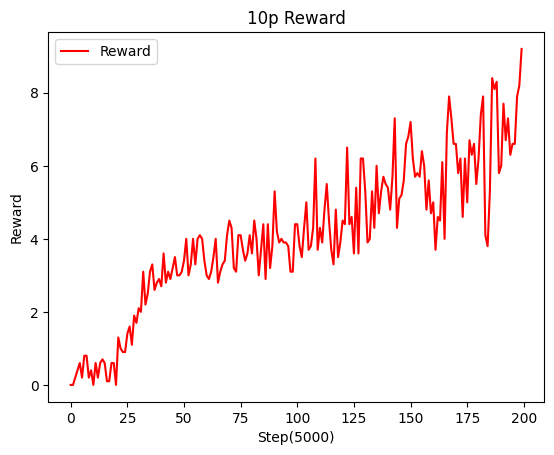

In [7]:
plt.plot(reward_r, label = 'Reward', color = 'red')
plt.xlabel('Step(5000)')
plt.ylabel('Reward')
plt.title('10p Reward')
plt.legend()

plt.show()

Loss 그래프

그래프를 확인하기전 예측하기로 타겟네트워크의 업데이트 주기안에서의 Loss그래프는 통상의 딥러닝모델훈련 중 관찰할 수 있는 우하향하는 그래프를 생각했었다. 또 이런 그래프를 바탕으로 학습율을 조정하고 오버피팅을 기준으로 적절한 타겟네트워크의 업데이트 주기를 선택할 수 있을거라고 생각했지만 이런 생각은 완전히 틀렸다. 아래에서 볼 수 있듯이 실제 그래프는 심한 노이즈탓에 분석의 무의미하다.

! DQN의 학습과정에서 나타나는 Loss그래프의 양상이 원래 이런지 확실하지 않으며 확인 필요.

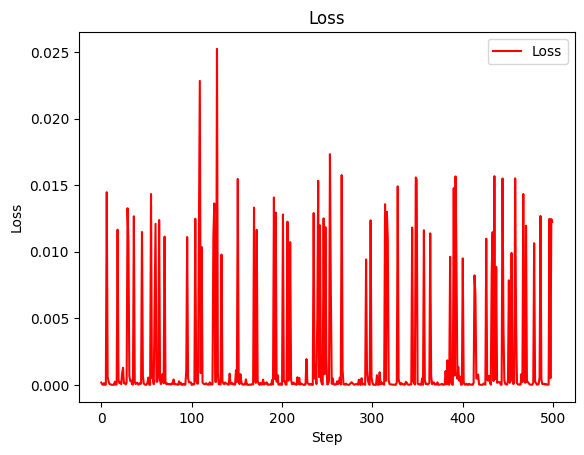

In [15]:
plt.plot(loss_r[2000:2500], label = 'Loss', color = 'red')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()

# 부록

강화학습에서는 생소한 개념이 많이 등장한다. 강화학습에서 많이 사용되는 수식들이 내포한 의미를 깊이 이해하기위해 직관적으로 이해가능한 수식으로부터 벨만 방정식을 유도하는 과정을 기록해놨다.

1.일단 직관적으로 이해가능한 MDP의 3개의 수식으로부터 시작한다.

i) Return G는 현 상태에서 에피소드가 끝날때까지 진행됐을때 얻는 reward의 합으로 discounter factor = $ \gamma $을 적용해 미래보상이 할인돼서 계산된다.

$G_{t}  \triangleq R_{t}+\gamma R_{t+1}+\gamma^{2} R_{t+2}+\gamma^{3} R_{t+3}+ ...$

ii) state value function $ V(S_{t}) $는 상태가치를 나타내는 함수로 현 상태로부터 에피소드가 끝날때까지 진행됬을때 얻을 수 있는 Returnd의 기댓값이다.

$ V(s_{t})  \triangleq \int_{a_{t}:a_{\infty}}G_{t}p(a_t,s_{t+1},a_{t+1}, ...|s_{t})d_{a_{t}:a_{\infty}} $

iii) action value function $Q(s_{t},a_{t})$는 행동가치를 나타내는 함수로 현상태에서 가능한 어떤 행동에서부터 에피소드가 끝날때까지 진행됬을때 얻을 수 있는 Return의 기댓값이다.

$ Q(s_t,a_t) \triangleq \int_{s_{t+1}:a_{\infty}}G_{t}p(s_{t+1},a_{t+1}, ...|s_{t})d_{s_{t+1}:a_{\infty}} $

상태가치함수와 행동가치함수 모두 다차원 확률변수에 대한 조건부기댓값으로 표현되므로 수식으로부터 정의된 개념을 직관적으로 이해할 수 있다.

2.위의 수식을 변형해 Bellman equation을 유도하는 과정에서 새로운 인사이트를 얻는다.

i) 상태가치함수 $V(s_t)$를 행동가치함수$Q(s_{t},a_{t})$로 표현하기.

$p(a_t,s_{t+1},a_{t+1}, ...|s_{t}) = p(s_{t+1},a_{t+1}, ...|s_{t},a_t)p(a_t|s_t)
$로부터 $V(s_t)$를 변형된 식으로 표현하면,

$ V(s_{t})  \triangleq \int_{a_t} \int_{s_{t+1}:a_{\infty}}G_{t}p(s_{t+1},a_{t+1}, ...|s_{t},a_t)d_{s_{t+1}:a_{\infty}} p(a_t|s_t)da_t $로 표혀되고 이식을 다시 행동가치함수$Q(s_{t},a_{t})$로 표현하면

$ \int_{a_t}Q(s_t,a_t)p(a_t|s_t)da_t $로 표현된다.

위 식으로부터 얻을 수 있는 인사이트는 상태가치함수 $V(s_t)$가 행동가치함수$Q(s_{t},a_{t})$의 기댓값으로 표현된다는 점 이다. 그러니까 상태에대한 가치는 그 상태에서 policy에 따라 취할 수 있는 행동가치의 평균, 즉 기댓값인 것 이다.

optimal policy($p^*(a_t,s_t) = \delta(a_t-a_t^*)$)
여기서 $a_t^* = argmax_{a_t}Q^*(s_t,a_t)$

또, 상태가치함수 $V(s_t)$를 maximzie하는 policy(행동정책) ($p(a_t|s_t)$) 즉 optimal policy는 행동가치함수 $Q(s_{t},a_{t})$가 가장 큰값만을 갖게하는 정책(greedy action)임을 알 수 있다.(단, 행동가치함수$Q(s_{t},a_{t})$가 $Q^*(s_{t},a_{t})$인 경우만, 즉 미래시점 행동이 모두 optimal policy에 의해 선택된경우)

ii) 상태가치함수 $V(s_t)$를 다음 시점의 상태가치함수 $V(s_t+1)$로 표현하기.

$ p(a_t,s_{t+1},a_{t+1}, ...|s_{t}) = p(a_{t+1}, ...|s_t,a_t, s_{t+1})p(a_t,s_{t+1}|s_t) $ 에서 다시 MDP의 특성으로 부터

$ p(a_{t+1}, ...|s_t,a_t, s_{t+1})p(a_t,s_{t+1}|s_t) = p(a_{t+1}, ...|s_{t+1})p(a_t,s_{t+1}|s_t) $으로 표현되고 또,

$G_{t}  \triangleq R_{t}+\gamma R_{t+1}+\gamma^{2} R_{t+2}+\gamma^{3} R_{t+3}+ ... = R_t+\gamma G_{t+1} $

위의 두 변현식으로 상태가치함수 $V(s_t)$를 다시 표현하면

$ \int_{a_t,s_{t+1}} \int_{a_{t+1}:a_{\infty}} (R_t+\gamma G_{t+1})p(a_{t+1}, ...|s_{t+1})d_{a_{t+1}:a_{\infty}} p(a_t,s_{t+1}|s_t)d_{a_t,s_{t+1}} $로 표현되고 이를 다시 다음시점의 상태가치함수 $V(s_t+1)$로 표현하면

$ \int_{a_t,s_{t+1}} (R_t+\gamma V(s_{t+1}))p(a_t,s_{t+1}|s_t)d_{a_t,s_{t+1}} $로 표현될 수 있다. 여기서 다시

$ p(a_t,s_{t+1}|s_t) = p(s_{t+1}|s_t,a_t)p(a_t|s_t) $로 변형해 표혀하면

$ \int_{a_t,s_{t+1}} (R_t+\gamma V(s_{t+1}))p(s_{t+1}|s_t,a_t)p(a_t|s_t)d_{a_t,s_{t+1}} $로 표현된다.

위의 수식이 Bellman equation으로 이로부터 얻을 수 있는 인사이트는 상태가치함수 $V(s_t)$가 다음시점의 상태가치함수 $V(s_{t+1})$, transition probablity($p(s_{t+1}|s_t,a_t)$), policy($p(a_t|s_t)$)로 표현된다는 점 이다. 특히 policy는 행동정책으로 상태가치함수를 maximize하는 policy, 즉 optimal policy를 찾는것은 강화학습의 주 목적이다.

비슷한 과정으로 행동가치함수$Q(s_{t},a_{t})$또한 다음 상태의 상태가치함수로 표현되거나 다음상태의 행동가치함수로 표현될 수 있다.

$ Q(a_t,s_t) = \int_{s_{t+1},a_{t+1}}(R_t + \gamma Q(s_{t+1},a_{t+1}))p(s_{t+1}|s_t,a_t)p(a_{t+1}|s_{t+1})d_{s_{t+1},a_{t+1}} $

이 또한 Bellman equation으로 상태가치함수의 Bellman equation과의 차이점은 다음상태의 행동정책의 영향을 받는다는 것 이다.

3.$Q^*$는 어떻게 구해지는가?

i) Monte_Carlo

먼저 큰 수의 법칙

$ E[X]=\int_x xp(x)dx \approx \frac{1}{N}\sum^N_{i=1} x_i $ 에 따라

$ Q(s_t,a_t) \triangleq \int_{s_{t+1}:a_{\infty}}G_{t}p(s_{t+1}:a_{\infty}|s_{t})d_{s_{t+1}:a_{\infty}} \approx \frac{1}{N}\sum G^i_t  $ 으로 근사하 수 있다.

위 수식이 이것이 Monte_carlo method이며 이로부터 얻을 수 있느 인사이트는 어떤상태에서 에피소드를 충분히 많이 진행하면서 얻어진 Q값의 평균으로 Q값을 $ Q^* $로 근사할 수 있다는 것 이다. 한계로는 수식을 보면 알 수 있듯이 에피소드를 끝까지 진행해야만 Q값이 업데이트 된다는 점 이다.

II) Temporal difference

먼저 위에서 유도한 행동가치함수의 Bellman equation

$ Q(a_t,s_t) = \int_{s_{t+1},a_{t+1}}(R_t + \gamma Q(s_{t+1},a_{t+1}))p(s_{t+1}|s_t,a_t)p(a_{t+1}|s_{t+1})d_{s_{t+1},a_{t+1}} $ 에 큰수의 법칙을 적용해

$ \approx \frac{1}{N}\sum^N_{i=1}(R^{(I)}_t + \gamma Q(s^{(i)}_{t+1},a^{(i)}_{t+1})) \triangleq \bar{Q_N} $로 근사할 수 있다.
여기서 R이 sample인 이유는 transition probablity때문으로 어떤 행동에 대한 결과 또한 확률적이기 때문이다.

Temporal difference가 Monte_carlo와 다른점은 Monte_carlo는 에피소드가 끝날때까지 진행해야만 Q값을 엄데이트할 수 있는 반면 Temperal difference는 위 수식에서 보는바와 같이 바로 다음시점의 Q값만으로 현시점의 Q값을 바로 업데이트 가능하다는 점 이다.

! $R^{N}_t + \gamma Q(s^{N}_{t+1}, a^{N}_{t+1}) - \bar{Q}_{N-1}$는 따로 TD error라고 부르고 TD error에서 다음시점의 보상과 Q의 샘플 $ R^{N}_t + \gamma Q(s^{N}_{t+1}, a^{N}_{t+1}) $을 TD-taget이라고 한다.

위 식을 변형해 다시 적으면

$ = \frac{1}{N}(\bar{Q}_{N-1}(N-1) + R^{N}_t + \gamma Q(s^{N}_{t+1}, a^{N}_{t+1})) $로 나타낼수 있고 이를 전개하면

$ = \bar{Q}_{N-1} + \frac{1}{N}(R^{N}_t + \gamma Q(s^{N}_{t+1}, a^{N}_{t+1}) - \bar{Q}_{N-1}) $ 로 표현할 수 있다.

이를 1-Step TD 또는 Incremental monte_carlo update라고 한며 이로부터 얻을 수 있는 인사이트는 큰수의 법칙으로부터 $Q^*$를 근사할때 이전 샘플들의 평균에서 다음 샘플을 합한 평균을 구할때 처음부터 계산하지 않고 약간의 변형으로 이전 평균값과 다음 샘플값만으로 다음평균값을 구할 수 있다는 것 이다.

또, 위식을 다시 변형해

$ \frac{1}{N} = \alpha $ 로 부터

$ (1-\alpha)\bar{Q}_{N-1} + \alpha(R^{N}_t + \gamma Q(s^{N}_{t+1}, a^{N}_{t+1})) $로 표현가능하며 이는 SARSA의 업데이트 공식이다.

MC와  SARSA를 비교해보면 SARSA는 업데이트 공식의 원본 $ Q(a_t,s_t) = \int_{s_{t+1},a_{t+1}}(R_t + \gamma Q(s_{t+1},a_{t+1}))p(s_{t+1}|s_t,a_t)p(a_{t+1}|s_{t+1})d_{s_{t+1},a_{t+1}} $으로부터 알 수 있듯이 다음상태의 Q값이 $ Q^*$가 아닌 이상 업데이트는 완전하지 않으며 이로부터 편향이 발생할 수 있다는 것 이다.(biased sample) 대신 에피소드가 끝날때가지 진행해야하는(unbiased sample) MC는 variance가 너무 커서 수렴이 쉽지 않다는 단점이 있다.

4.Q러닝

Q러닝의 업데이트 공식은 SARSA와 같다. 차이점은 Behaier policy와 Target policy가 다르다는 점이다(off policy). 즉 SARSA는 행동정책과 업데이트 샘플을 선택하는 타겟정책이 같고(on policy) Q러닝은 이것이 다르다는 것 이다.

$ Q(a_t,s_t) = \int_{s_{t+1},a_{t+1}}(R_t + \gamma Q(s_{t+1},a_{t+1}))p(s_{t+1}|s_t,a_t)p(a_{t+1}|s_{t+1})d_{s_{t+1},a_{t+1}} $

$ \approx (1-\alpha)\bar{Q}_{N-1} + \alpha(R^{N}_t + \gamma Q(s^{N}_{t+1}, a^{N}_{t+1})) $

위 수식에서 Target policy는 $ p(a_{t+1}|s_{t+1}) $ Behavior policy는 $ p(s_{t+1}|s_t,a_t) $이다.

SARSA는 현상태에서 행동후 다음 상태에 또한 행동정책에 의해 샘플링된 Q값으로 현 Q값이 업데이트 돼고 Q러닝은 현상태서 행동후 다음 상태에서 현동정책과는 별개로 다른 전략으로 Q값을 선택해 업데이트할 수 있다. 이로부터 얻을 수 있는이점은 행동 정책의 탐험률은 높여서 optimal에 도달할 여러 route를 탐색하면서도 업데이트는 가장 높은 Q값으로 업데이트(greedy polcy)하는것이 가능하다는 것 이다.

정리해 보자면 MDP위에서 이뤄지는 task를 해결하기위해 상태가치함수나 행동가치함수를 최대화하는 전략을 사용할 수 있고 그 방법으로 Monte-carlo method와 Temporal difference이 있다. 그 중 Temporal difference는 on-policy와 off-policy로 나눌 수 있으며 각각 SARSA, Q-learning이라고 한다.